In [1]:
from PIL import Image, ImageFilter
import cv2 as cv
import numpy as np
import math
import random
import time


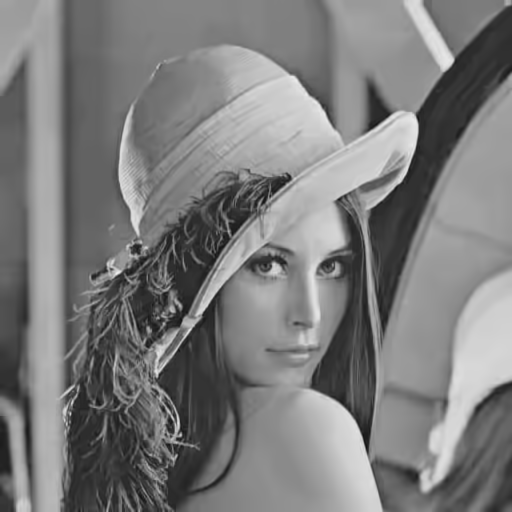

In [2]:
img = Image.open(r'/home/segganeadel/Downloads/lena.png').convert('L')
img

In [3]:
mat = np.array(img)

random.seed(time.time())

moyenne = int(mat.mean())
ecarT = np.std(mat)

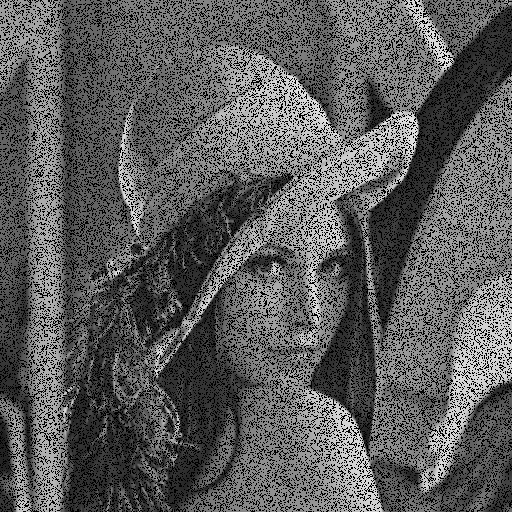

In [4]:
for i in range(len(mat)):
    for j in range(len(mat[0])):
        roll = random.randint(0, 100)
        if roll >= 75:
            mat[i][j] = (1/math.sqrt(2*math.pi*ecarT))*math.exp(((mat[i][j]-moyenne)*(mat[i][j]-moyenne)*(-1))/(2*(ecarT * ecarT)))
imgSP = Image.fromarray(mat)
imgSP.save('Bruit.png')
imgSP

In [5]:
kernel = np.ones((5, 5), np.uint8)
img2 = cv.imread('Bruit.png', 0)
img_dilation = cv.dilate(img2, kernel, iterations=1)
img_erosion = cv.erode(img_dilation, kernel, iterations=1)

img_erosion

array([[161, 161, 161, ..., 164, 164, 164],
       [161, 161, 161, ..., 164, 164, 164],
       [161, 161, 161, ..., 164, 164, 164],
       ...,
       [ 52,  52,  52, ..., 101, 102, 103],
       [ 52,  52,  52, ..., 103, 105, 105],
       [ 52,  52,  52, ..., 104, 105, 106]], dtype=uint8)

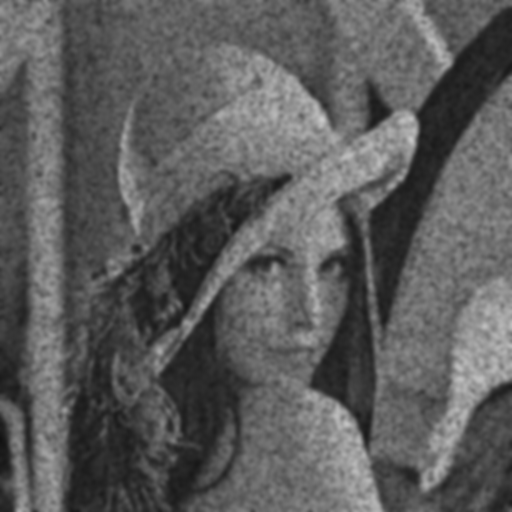

In [6]:
img3 = Image.open('Bruit.png')
img3 = img3.filter(ImageFilter.GaussianBlur)
img3.save('Gaussian.png')
img3

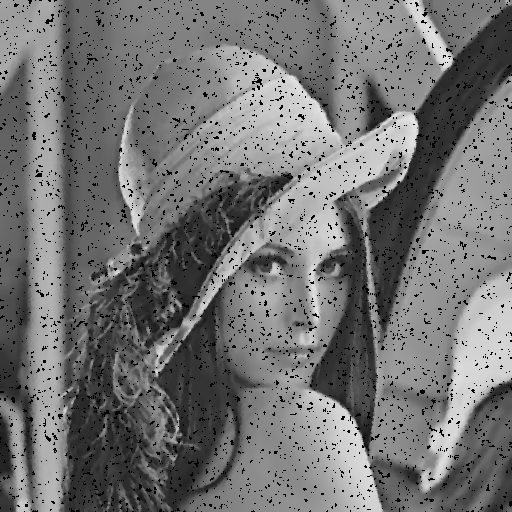

In [7]:
img4 = Image.open('Bruit.png')
img4 = img4.filter(ImageFilter.MedianFilter)
img4.save('Median.png')
img4

In [8]:
img5 = cv.imread('Bruit.png', 0)
img_sobelx = cv.Sobel(img5, cv.CV_8U, 1, 0, ksize=5)
img_sobely = cv.Sobel(img5, cv.CV_8U, 0, 1, ksize=5)
img_sobel = img_sobelx + img_sobely
cv.imwrite('Sobel.png', img_sobel)
img_sobel

array([[  0,   0,   0, ..., 255, 255,   0],
       [  0, 255, 254, ..., 254, 254, 255],
       [  0, 255, 254, ..., 254, 182, 255],
       ...,
       [255, 255, 255, ..., 254, 254, 255],
       [  0,  52,  51, ..., 170, 254, 255],
       [  0,   0, 255, ..., 255, 255,   0]], dtype=uint8)

In [9]:
img6 = cv.imread('Bruit.png', 0)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv.filter2D(img6, -1, kernelx)
img_prewitty = cv.filter2D(img6, -1, kernely)
img_prewitt = img_prewittx + img_prewitty
cv.imwrite('Prewitt.png', img_prewitt)
img_prewitt

array([[  0, 161,   0, ..., 155,   0,   0],
       [255,   0,   0, ...,   0,   0,   1],
       [255, 160, 161, ..., 136,   0,   0],
       ...,
       [  0,   0,  52, ..., 112, 104,   0],
       [104,   0,  52, ..., 111,   6,   0],
       [  0,   0,  52, ..., 213,   6,   0]], dtype=uint8)